In [211]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [683]:
import  numpy as np

In [684]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [391]:

# Import scikit-learn module for module building
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

 # Import scikit-Learn module for train and test data
from sklearn.model_selection import train_test_split

# Import scikit-Learn module for K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Import modele for classification Report
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

In [463]:
from sklearn.svm import SVC 

In [581]:
#Importing the dataset
df_cust = pd.read_csv('C:/Users/Gayathri/Desktop/Springboard/BankChurners.csv')

In [582]:
# Summary of the dataset
df_cust.info

<bound method DataFrame.info of        CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income

In [583]:
# Dropping the irrelavent column
df_cust.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                      inplace= True)

In [584]:
# Dropping the irrelavent column
df_cust.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
            inplace= True)

In [585]:
# Just taking a look at few columns

df_cust.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [586]:
# Looking at the missing data

missing_sum = df_cust.isnull().sum()

missing_sum

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

The dataset didnt have any missing values


In [587]:
df_cust.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

Just checkin the dataset to see if there is any duplicate items using the client id columnn

In [588]:
df_cust['CLIENTNUM'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10122    False
10123    False
10124    False
10125    False
10126    False
Name: CLIENTNUM, Length: 10127, dtype: bool

In [589]:
df_cust.select_dtypes('object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
10122,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
10123,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
10124,Attrited Customer,F,High School,Married,Less than $40K,Blue
10125,Attrited Customer,M,Graduate,Unknown,$40K - $60K,Blue


In [590]:
# Find the percentage of record in each category

df_cust['Attrition_Flag'].value_counts()/10127 * 100



Existing Customer    83.934038
Attrited Customer    16.065962
Name: Attrition_Flag, dtype: float64

Almost 84% of the record belongs to Existing customer category and 16% belongs to the Attrited customer category. We have imbalanced class here.

Text(0.5, 1.0, 'Distribution of the Attrition Flag')

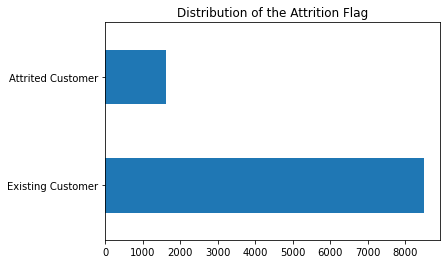

In [591]:
# Ploting the distribution
df_cust['Attrition_Flag'].value_counts().plot(kind='barh')

plt.title('Distribution of the Attrition Flag')

**Defining a function to plot Attrition Flag with different catogorical columns**

In [592]:
# Defining a fution to group by different columns and ploting agint 'Attrition Flag'
def plot_dist(col_name, d_column ='Attrition_Flag'):
    df_temp = df_cust.groupby([col_name])[d_column].value_counts()
    df_temp.unstack().plot(kind = 'barh')
    return

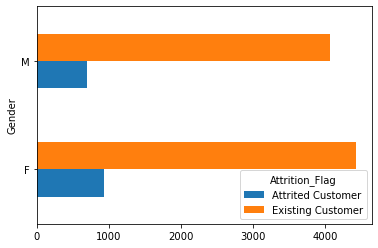

In [593]:
## Grouping by Gender
plot_dist('Gender')

From the above distribution, it looks like more Female customers cancled the credit card.

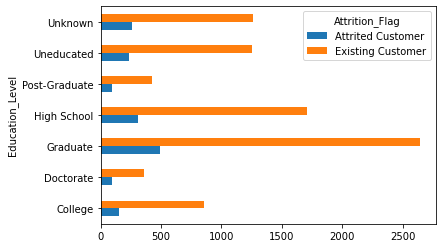

In [594]:
plot_dist('Education_Level')

From the above bar chart customers who are graduates cancelled the credit card.Also, the extisiting curstomer also belongs to the Graduate category. There is also an unknown caregorey

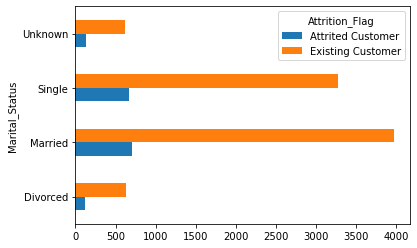

In [595]:
plot_dist('Marital_Status')

There is an unknow category in the Marital Stauts as well. The distribution for cancellation is similar for single and married customers

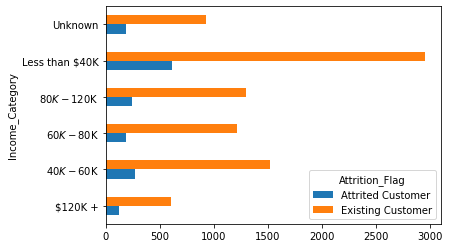

In [596]:
plot_dist('Income_Category')

The customers with income less than 40K cancelled more.

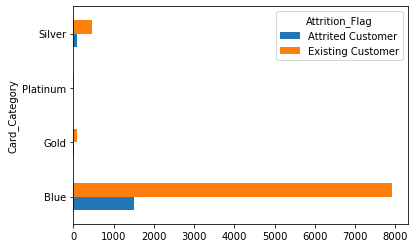

In [597]:
plot_dist('Card_Category')

It looks like most of the customer are in the Blue category. There aren't any considerable records in other categories

Just chekcing whehter the Unknow column is patttern that same customer has not provided data. Creating set to identify unique Client id. Only 7 customer has not provided 

In [602]:
lis1 = df_cust['CLIENTNUM'][df_cust['Education_Level']=='Unknown']

In [603]:
lis2 = df_cust['CLIENTNUM'][df_cust['Marital_Status']=='Unknown']

In [604]:
lis3 =df_cust['CLIENTNUM'][df_cust['Income_Category']=='Unknown']

In [605]:
set(lis1) & set(lis2) & set(lis3)

{709375158, 712019883, 714127383, 715007583, 719329983, 755959683, 769701258}

## Exploring Numerical values

In [606]:
df_cust1 =df_cust[['Attrition_Flag','Customer_Age','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

In [607]:
df_cust1.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397
Total_Trans_Amt,10127.0,4404.086304,3397.129254,510.0,2155.500,3899.000,4741.000,18484.000
Total_Trans_Ct,10127.0,64.858695,23.472570,10.0,45.000,67.000,81.000,139.000


**Histogram for all the numeric features**

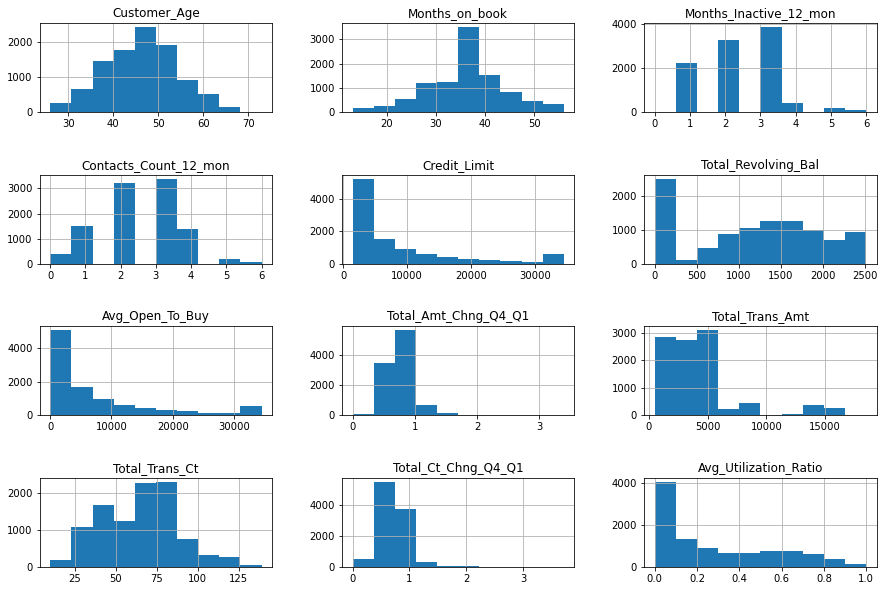

In [608]:

df_cust1.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.7);

•	Credit_Limit values are clustred toward lowerend <br/>
•	Total_Trans_Amt also clustred toward lowerend <br/>
•	Avg_Utilizaiton_Ratio is also skewed to left


 **Scale the data**

In [609]:
# Setting the index of the Datafram as Attrition_flag
df_cust_scale = df_cust1.set_index('Attrition_Flag')

# Saving the index and cloumns for later 
df_cust_index = df_cust_scale.index
df_cust_columns =df_cust_scale.columns

In [610]:
df_cust_scale.head()

,Customer_Age,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Attrition_Flag,,,,,,,,,,,,
Existing Customer,45,39,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
Existing Customer,49,44,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
Existing Customer,51,36,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
Existing Customer,40,34,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
Existing Customer,40,21,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [611]:
# Passing the DF to 'Scale()'
df_cust_scale = scale(df_cust_scale)

In [612]:
# Creating a dataframe with the scaled data
df_cust_scaled = pd.DataFrame(df_cust_scale, columns=df_cust_columns)
df_cust_scaled.head()

,Customer_Age,Months_on_book,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,-0.165406,0.384621,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882
1,0.333570,1.010715,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276
2,0.583058,0.008965,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155
3,-0.789126,-0.241473,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686
4,-0.789126,-1.869317,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155


**Verifying the scaled data**

In [613]:
df_cust_scaled.mean()

Customer_Age              3.127744e-17
Months_on_book           -5.687166e-16
Months_Inactive_12_mon   -2.129892e-15
Contacts_Count_12_mon     1.588144e-15
Credit_Limit              9.430893e-16
Total_Revolving_Bal      -1.830898e-15
Avg_Open_To_Buy          -4.386159e-17
Total_Amt_Chng_Q4_Q1     -2.522751e-16
Total_Trans_Amt          -5.134192e-16
Total_Trans_Ct            1.194179e-14
Total_Ct_Chng_Q4_Q1      -1.100466e-16
Avg_Utilization_Ratio    -2.186132e-16
dtype: float64

Mean of the scaled dataframe is close to zero

In [614]:
df_cust_scaled.std(ddof=0)

Customer_Age              1.0
Months_on_book            1.0
Months_Inactive_12_mon    1.0
Contacts_Count_12_mon     1.0
Credit_Limit              1.0
Total_Revolving_Bal       1.0
Avg_Open_To_Buy           1.0
Total_Amt_Chng_Q4_Q1      1.0
Total_Trans_Amt           1.0
Total_Trans_Ct            1.0
Total_Ct_Chng_Q4_Q1       1.0
Avg_Utilization_Ratio     1.0
dtype: float64

Using the biased estimator for standard deviation (ddof=0), it gave the exptected result as 1.

**Calculate the PCA transformation** <br/>
Fit the PCA transformation using the scaled data.

In [615]:
df_cust_PCA = PCA().fit(df_cust_scaled)

In [616]:
df_cust_PCA.explained_variance_ratio_

array([2.09589054e-01, 1.64792187e-01, 1.45785897e-01, 1.15091833e-01,
       1.03158636e-01, 8.22445691e-02, 7.81538716e-02, 5.04961930e-02,
       1.86340639e-02, 1.76368005e-02, 1.44168951e-02, 2.20606841e-32])

Plot the cumulative variance ratio with number of components.

Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components')

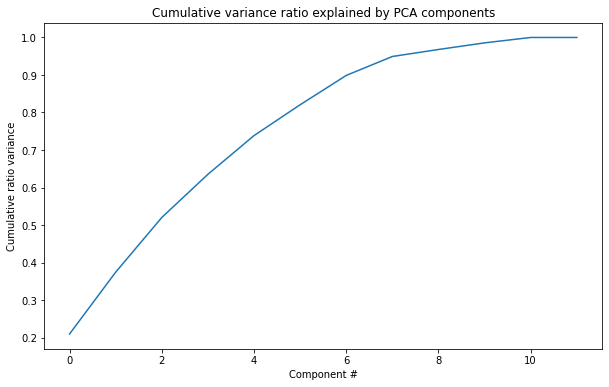

In [617]:
plt.subplots(figsize=(10, 6))
plt.plot(df_cust_PCA.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components')

Over 75% of the variance is explained by frist 4 components and first 6 explains 90% of variance

In [618]:
columns = ['Customer_Age','Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit',
           'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
           'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']



**Boxplot for all the numeric features with Attirion Flag**

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

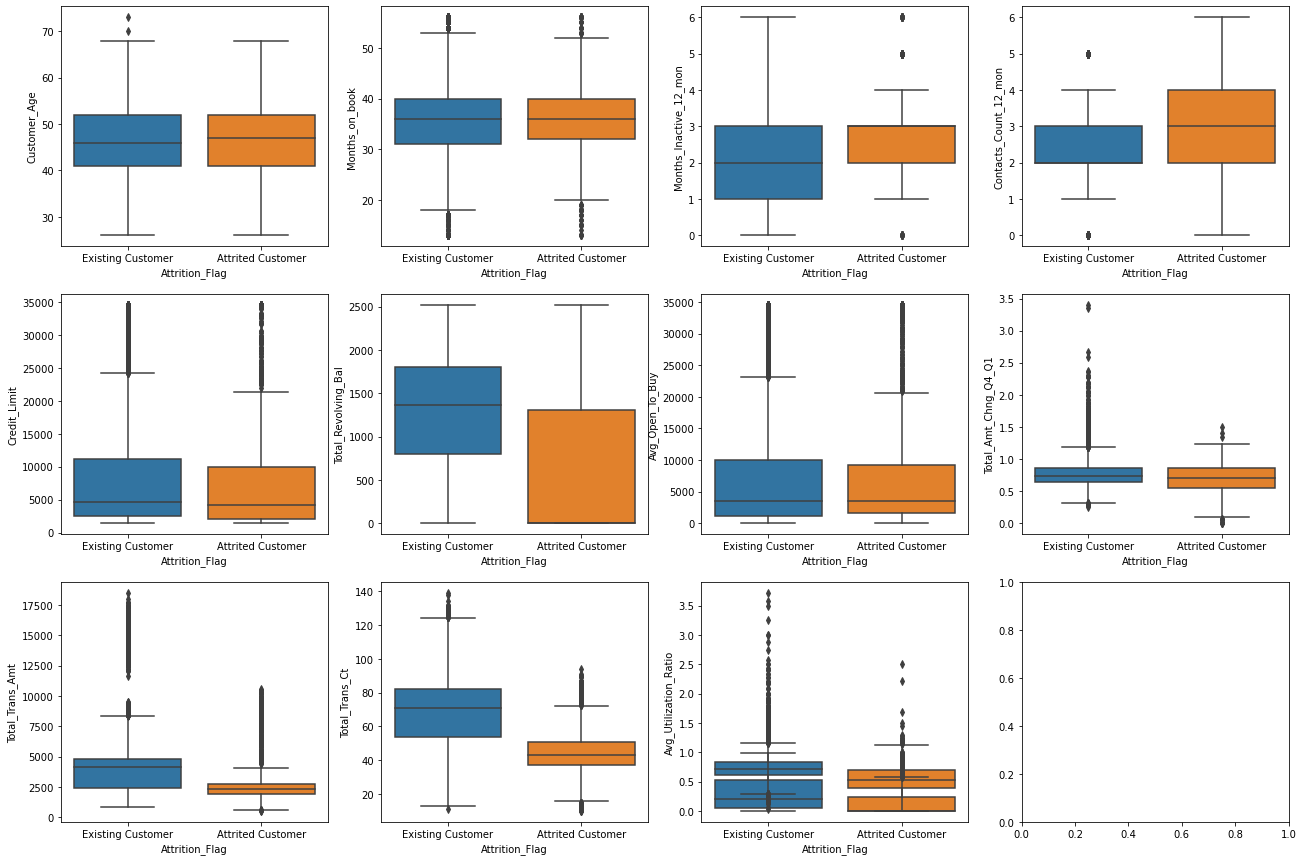

In [619]:

fig, axes = plt.subplots(3, 4, figsize=(22, 15))
sns.boxplot(ax=axes[0, 0], data=df_cust1, x='Attrition_Flag', y='Customer_Age')
sns.boxplot(ax=axes[0, 1], data=df_cust1, x='Attrition_Flag', y='Months_on_book')
sns.boxplot(ax=axes[0, 2], data=df_cust1, x='Attrition_Flag', y='Months_Inactive_12_mon')
sns.boxplot(ax=axes[0, 3], data=df_cust1, x='Attrition_Flag', y='Contacts_Count_12_mon')
sns.boxplot(ax=axes[1, 0], data=df_cust1, x='Attrition_Flag', y='Credit_Limit')
sns.boxplot(ax=axes[1, 1], data=df_cust1, x='Attrition_Flag', y='Total_Revolving_Bal')
sns.boxplot(ax=axes[1, 2], data=df_cust1, x='Attrition_Flag', y='Avg_Open_To_Buy')
sns.boxplot(ax=axes[1, 3], data=df_cust1, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')
sns.boxplot(ax=axes[2, 0], data=df_cust1, x='Attrition_Flag', y='Total_Trans_Amt')
sns.boxplot(ax=axes[2, 1], data=df_cust1, x='Attrition_Flag', y='Total_Trans_Ct')
sns.boxplot(ax=axes[2, 2], data=df_cust1, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1')
sns.boxplot(ax=axes[2, 2], data=df_cust1, x='Attrition_Flag', y='Avg_Utilization_Ratio')

From the above box plot credit_limit,Avg_open_to_buy, total_amt_change_q4toq1, total_trans_amt,utilizaiton ratio all these columns has outliers in both categoies. <br/>

The contact_count_12_mon seems to have wide range the Attried cusomers and its is less for the existing customers.<br/>
Months on book has similar distribution for both categories.


In [620]:
# Replacing the Exisiting Customer as 0
df_cust1.replace('Existing Customer',0,inplace=True)
    


C:\Users\Gayathri\anaconda3\lib\site-packages\pandas\core\frame.py:4379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [621]:
# Replacing the Attrited Customer as 1
df_cust1.replace('Attrited Customer',1,inplace=True)

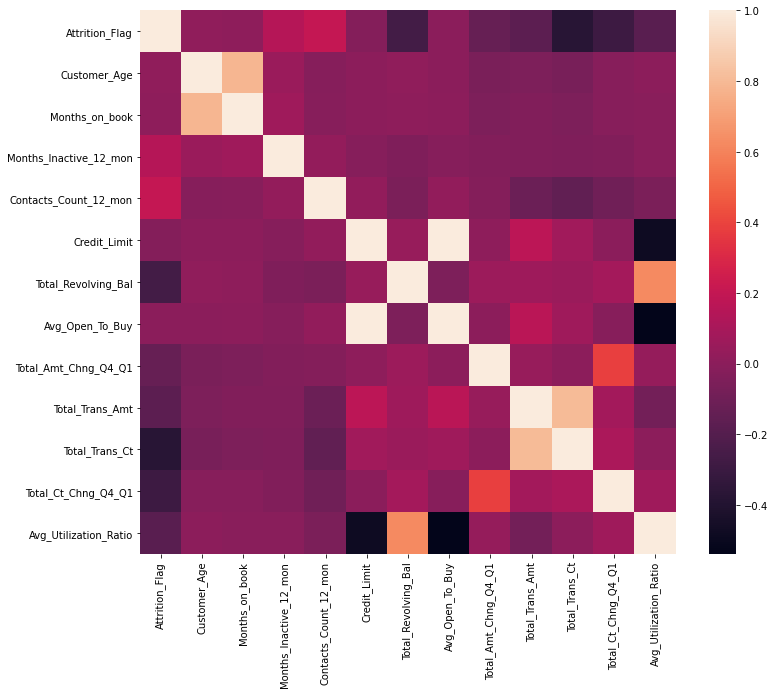

In [622]:
plt.subplots(figsize=(12,10))
sns.heatmap(df_cust1.corr());

Customer Age, Month on book and Months incative are resonably correlated with Attrition Flag. Also,some of the features are correlated to each other.

In [623]:
df_cust.replace('Existing Customer',0,inplace=True)
df_cust.replace('Attrited Customer',1,inplace=True)

In [624]:
df_cust.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [625]:
features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

features

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

In [626]:
df_onehot = df_cust.copy()

In [627]:
for col in features:
    df_onehot = pd.get_dummies(df_onehot,columns=[col], prefix = col)

In [628]:
df_onehot.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0


In [629]:
df_onehot.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown',
       'Income_Category_$120K +', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Blue', 'Card_Category_Gold', 'Card_

**Setting up the X,Y for modeling**

In [630]:
X = df_onehot.drop(columns= 'CLIENTNUM', inplace=True)

In [631]:
Y = df_onehot['Attrition_Flag']

In [632]:
X = df_onehot.drop(columns= 'Attrition_Flag')

In [633]:
Y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

## Decision Tree

In [634]:
#Spliting the dataset into to 70% train and 30% test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state =100)                           
                           
#Creating a Decision Tree
model = DecisionTreeClassifier(criterion = "gini", random_state =100, max_depth=8,
                               min_samples_leaf=4)
# Training the model    
model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=100)

In [635]:
# Predicting with the model
predicted = model.predict(x_test)

# Creating a Classification report
report= classification_report(y_test, predicted)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2516
           1       0.87      0.79      0.83       523

    accuracy                           0.94      3039
   macro avg       0.92      0.88      0.90      3039
weighted avg       0.94      0.94      0.94      3039



In [636]:
from sklearn import metrics
accuracy_level = metrics.accuracy_score(y_test,predicted)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))

Accuracy: 94.406%



The accuracy of the model is 94.5%. Since we have imbalanced class, its good to check the F1-Score which accounts for both Precision and Recall. It is 90% for this model

## Pipeline <br/>

**Decision Tree model**

In [675]:
# Builing a pipeline for Classification
pipe = make_pipeline(DecisionTreeClassifier())            
                    
    


In [676]:
# Training using pipeline
pipe.fit(x_train,y_train)

Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier())])

In [677]:
# Predict using pipeline
predicted = pipe.predict(x_test)

In [678]:
# Classification Report fr the pipeline
report= classification_report(y_test, predicted)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2516
           1       0.82      0.79      0.80       523

    accuracy                           0.93      3039
   macro avg       0.89      0.88      0.88      3039
weighted avg       0.93      0.93      0.93      3039



In [679]:
accuracy_level = metrics.accuracy_score(y_test,predicted)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))

Accuracy: 93.353%


Acccuracy for both are similar.F1 score reduced to 88%

**Assessing performance using cross-validation**

In [680]:
cv_results_DT = cross_validate(pipe, x_train, y_train, cv=5)

In [681]:
cv_scores = cv_results_DT['test_score']
cv_scores

array([0.92736248, 0.92947814, 0.93229901, 0.93577982, 0.93225124])

In [685]:
np.mean(cv_scores), np.std(cv_scores)

(0.9314341369607219, 0.002853239989754218)

**RandomForest model**

In [642]:
RF_pipe = make_pipeline(RandomForestClassifier(random_state=47))

In [643]:
RF_pipe.fit(x_train,y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(random_state=47))])

In [644]:
predicted_rf = RF_pipe.predict(x_test)

In [645]:
accuracy_level = metrics.accuracy_score(y_test,predicted_rf)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))

Accuracy: 95.295%


In [646]:
report= classification_report(y_test, predicted_rf)

print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2516
           1       0.95      0.77      0.85       523

    accuracy                           0.95      3039
   macro avg       0.95      0.88      0.91      3039
weighted avg       0.95      0.95      0.95      3039



**Assessing the performance using cross validation**

In [686]:
cv_results_RF = cross_validate(RF_pipe, x_train, y_train, cv=5)

In [687]:
cv_scores = cv_results_RF['test_score']
cv_scores

array([0.94569817, 0.94922426, 0.94217207, 0.94707128, 0.95765702])

In [688]:
np.mean(cv_scores), np.std(cv_scores)

(0.9483645597036986, 0.005181082062438951)

With Randomforest Classifier the accuracy of the model was almost the same as before and f1 score is around 91% <br/>
The RF model was assessed using crossvalidation and the mean accuracy was around 94%


## Gridsearch <br/>

GridsearchCV() is used to find the best parameter of the Randomforset Classifier

In [647]:
#Get the parameters of Random forest
RF_pipe.get_params()

{'memory': None,
 'steps': [('randomforestclassifier',
   RandomForestClassifier(random_state=47))],
 'verbose': False,
 'randomforestclassifier': RandomForestClassifier(random_state=47),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_impurity_split': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': None,
 'randomforestclassifier__oob_score': False,
 'randomforestclassifier__random_state': 47,
 'ra

In [697]:
#Selecting the parameters for creating Grid
param_grid = {'randomforestclassifier__n_estimators':[50,100],
'randomforestclassifier__max_features':[0.8,"auto"],
'randomforestclassifier__max_depth':[4,5]}

In [698]:
# Passing the pipeline and the parameters
grid = GridSearchCV(RF_pipe, cv=5, param_grid=param_grid)

In [699]:
# Training the model
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier(random_state=47))]),
             param_grid={'randomforestclassifier__max_depth': [4, 5],
                         'randomforestclassifier__max_features': [0.8, 'auto'],
                         'randomforestclassifier__n_estimators': [50, 100]})

In [708]:
predicted_grid = grid.predict(x_test)

In [709]:
accuracy_level = metrics.accuracy_score(y_test,predicted_grid)
print(("Accuracy: %.3f%%") % (accuracy_level*100.0))

Accuracy: 94.209%


In [711]:
report= classification_report(y_test, predicted_grid)

print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2516
           1       0.87      0.78      0.82       523

    accuracy                           0.94      3039
   macro avg       0.91      0.88      0.89      3039
weighted avg       0.94      0.94      0.94      3039



In [710]:
# Best parameters from the grid
grid.best_params_

{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__max_features': 0.8,
 'randomforestclassifier__n_estimators': 50}

**Assessing the grid model with crossvalidation**

In [706]:
rf_best_cv_results = cross_validate(grid.best_estimator_, x_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.94428773, 0.9506347 , 0.94076164, 0.94636556, 0.94918843])

In [707]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9462476098712689, 0.0035169840830912443)

The avarage accuracy of the grid model was around 94%

In [703]:
# Important Features from the model
imp = grid.best_estimator_.named_steps.randomforestclassifier.feature_importances_

In [704]:
#Creating a series with the columns
features_imp = pd.Series(imp, index=x_train.columns).sort_values()

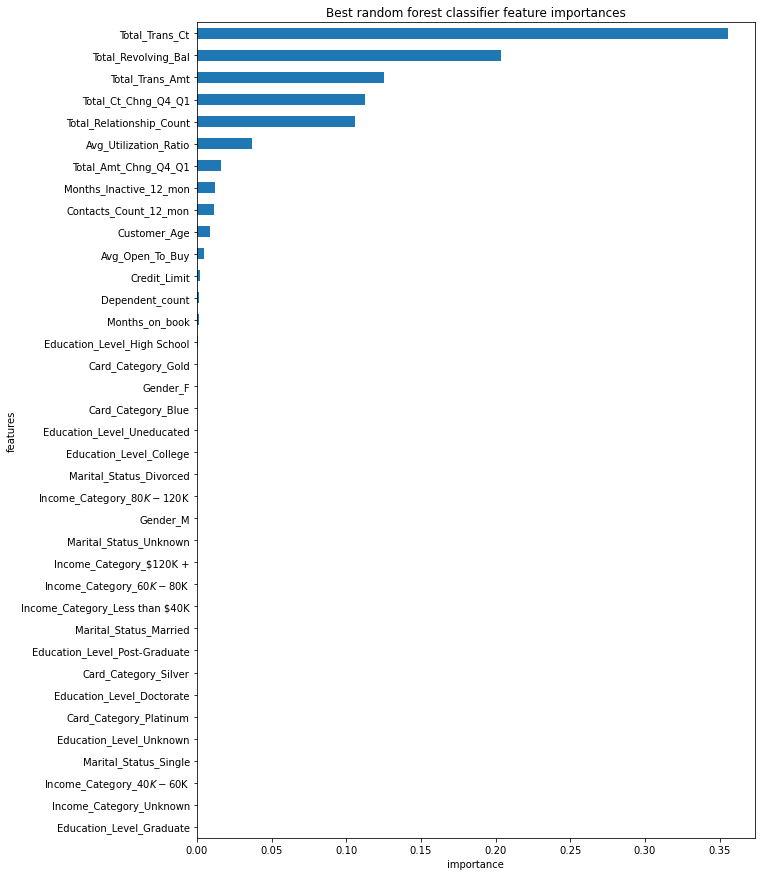

In [705]:
plt.subplots(figsize=(10, 15))
features_imp.plot(kind='barh')
plt.ylabel('features')
plt.xlabel('importance')
plt.title('Best random forest classifier feature importances');

**From the RandomForest model these are the important features** <br/>
•	Total_Trans_Ct                 
•	Total_Revolving_Bal            
•	Total_Trans_Amt                
•	Total_Ct_Chng_Q4_Q1            
•	Total_Relationship_Count       




**Conclusion** <br/>

The random forest model had an accuracy of 94% with the pipeline and using grid search a well.Verifying performance on the test set produces performance consistent with the cross-validation results. with the RF model, the important features were found.